In [1]:
%load_ext autoreload
%autoreload 2

import time
import pandas as pd
import random
import networkx as nx
import numpy as np
import cstrees.cstree as ct


In [5]:
from mpl_toolkits.mplot3d import Axes3D

DEBUG:matplotlib:CACHEDIR=/home/f/l/flrios/.cache/matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /home/f/l/flrios/.cache/matplotlib/fontlist-v330.json


In [7]:
from cstrees import csi_relation
c = csi_relation.Context({0:0, 3:1})
print(c)


X0=0, X3=1


In [13]:
ci = csi_relation.CI({1}, {2}, {4, 5})
print(ci)

X1 ⊥ X2 | X4, X5


In [17]:
csi = csi_relation.CSI(ci, c)
print(csi)

X1 ⊥ X2 | X4, X5, X0=0, X3=1


In [18]:
csi.as_list()

[{0}, None, None, {1}, {0, 1}, {0, 1}]

csi = csi_relation.CSI(c, ci)

   0  1  2  3  4
0  2  2  2  2  2
0  0  -  -  -  -
0  1  -  -  -  -
0  *  1  -  -  -
0  *  0  -  -  -
0  *  *  *  -  -
0  *  0  *  *  -
0  *  1  *  *  -
0  -  -  -  -  -


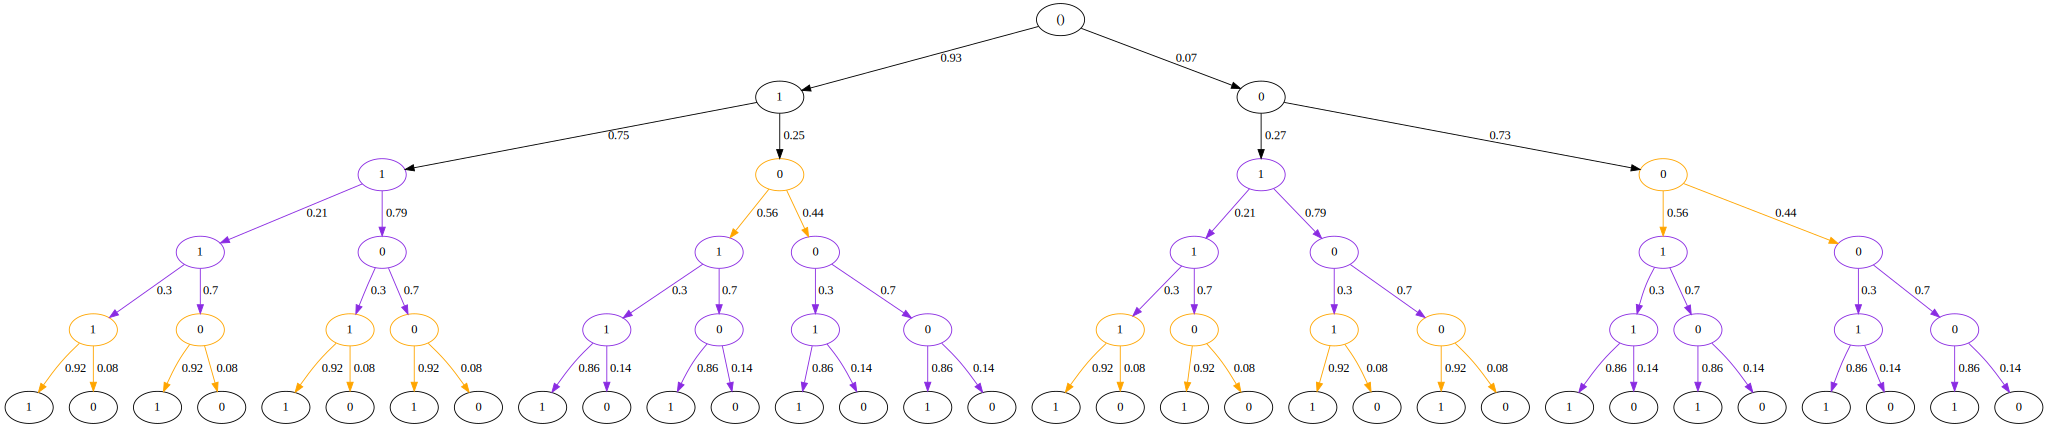

In [9]:
p = 5
cards = [2] * p
t = ct.sample_cstree(cards, max_cvars=1, prob_cvar=0.5, prop_nonsingleton=1)
# setting  cvar_prob to 1 give not the same as when trying insolated below, 
# its strange.
t.sample_stage_parameters()
a = t.plot()

for l, ss in t.stages.items():
    #print(l)
    for s in ss:
        pass
#        print(s)
df = t.to_df()
print(df)
df.to_csv("cstree.csv", index=False)
a
#t.sample(10)


In [10]:
stage = ct.Stage([{0, 1}, {0, 1}, {0, 1}])
stage2 = ct.Stage([1, {0, 1}, 1]) # blue
#stage = ct.Stage([{0, 1}, {0, 1},0, {0, 1}, 1])
#stage2 = ct.Stage([1, {0, 1}, 0, 1, 1])
#stage = ct.Stage([{0,1}, {0, 1}, 1])
#stage2 = ct.Stage([{0,1}, 1, 1])

print(stage)
print(stage2)

res = stage - stage2
print("res")
for c in res:
    print(c)

base = res.pop(1)
res += base - ct.Stage([1, {0, 1}, 0]) # orange
print("res")
for r in res:
    print(r)

base = res.pop(0)
print(base)
res += base - ct.Stage([0, {0, 1}, 1]) # red

print("res")
for r in res:
    print(r)




[{0, 1}, {0, 1}, {0, 1}]
[1, {0, 1}, 1]
res
[0, {0, 1}, {0, 1}]
[1, {0, 1}, 0]
res
[0, {0, 1}, {0, 1}]
[0, {0, 1}, {0, 1}]
res
[0, {0, 1}, 0]
